<a href="https://colab.research.google.com/github/CamPaiva/sight-and-sound/blob/main/Sight%26Sound2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
# Create function to make a new dataframe to count the frequency with which certain strings appear.
# We will use it here first to count the number of films per country, but this would be useful later to count
# the most common directors, gender of directors, genre of films, etc.

def count_frequency(df, column):  #put column name in quotation marks
    ordered_values = pd.DataFrame(df[column].value_counts())  #this counts and orders the values that repeat
    ordered_values["Frequency"] = df[column].value_counts(normalize=True)  # creates a frequency column, use "ascending=False" for desc order
    ordered_values = ordered_values.reset_index()  #this reattaches a numbered index column to the left
    ordered_values = ordered_values.rename(columns = {"index": column, column: "Number of Items"})  #this changes the messed up column names
    return ordered_values

In [ ]:
# This function is designed to follow up from the grouping function.
# This changes the name of all items that make up less than a certain percentage of the total to "Others".
# The others are then placed at the end, no matter what the count number is.
def group_others(df, column, percentage): #the percentage should be placed as a number (e.g. 0.02, not "2%")
    df.loc[df.Frequency < percentage, column] = 'Others' 
    all_plus_others = (df
                .groupby(column).sum()
                .sort_values('Number of Items', ascending=False)
                .reset_index())
    list_others_last = pd.DataFrame()
    list_others_last = list_others_last.append(all_plus_others[all_plus_others[column] != "Others"])
    list_others_last = list_others_last.append(all_plus_others[all_plus_others[column] == "Others"])
    list_others_last.reset_index(inplace=True, drop=True)
    return list_others_last

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/Sight&Sound

/content/drive/MyDrive/Sight&Sound


In [ ]:
# Load data
df_full = pd.read_csv("Full_S&S.tsv", sep='\t')

In [ ]:
# Let's take a look at it
df_full

,S&S_Title,Wikidata_ID,Director,Director_gender,Screenwriter,Screenwriter_gender,Original_Title,English_Title,IMDb ID,Genre,...,Actors,Runtime(min),Rated,Country,Year,2022_Poll,2012_Poll,Position_2022,Position_2012,OMDb
0,Intolerance,Q192206,D. W. Griffith,male,D. W. Griffith&Tod Browning&Anita Loos&Frank E...,male&male&female&male,Intolerance,Intolerance,tt0006864,"Drama, History",...,"Lillian Gish, Robert Harron, Mae Marsh",197,Passed,United States,1916,False,True,NaN,93.0,"{""Title"":""Intolerance"",""Year"":""1916"",""Rated"":""..."
1,Sherlock Jr,Q1569918,Buster Keaton&Roscoe Arbuckle,male&male,Clyde Bruckman&Jean Havez&Joseph A. Mitchell,male&male&male,Sherlock Jr.,Sherlock Jr.,tt0015324,"Action, Comedy, Romance",...,"Buster Keaton, Kathryn McGuire, Joe Keaton",45,Passed,United States,1924,True,True,54.0,59.0,"{""Title"":""Sherlock Jr."",""Year"":""1924"",""Rated"":..."
2,Battleship Potemkin,Q152350,Sergei Eisenstein,male,Sergei Eisenstein&Nikolai Aseev&Sergei Tretyak...,male&male&male&female,Броненосец «Потёмкин»,Battleship Potemkin,tt0015648,"Drama, History, Thriller",...,"Aleksandr Antonov, Vladimir Barskiy, Grigoriy ...",66,Not Rated,Soviet Union,1925,True,True,54.0,11.0,"{""Title"":""Battleship Potemkin"",""Year"":""1925"",""..."
3,Greed,Q690583,Erich von Stroheim,male,Joseph Farnham&Erich von Stroheim&June Mathis,male&male&female,Greed,Greed,tt0015881,"Drama, Thriller, Western",...,"Gibson Gowland, Zasu Pitts, Jean Hersholt",140,Not Rated,United States,1925,False,True,NaN,84.0,"{""Title"":""Greed"",""Year"":""1924"",""Rated"":""Not Ra..."
4,The General,Q850159,Buster Keaton&Clyde Bruckman,male&male,Al Boasberg&Paul Girard Smith&Clyde Bruckman&C...,male&male&male&male&male&male,The General,The General,tt0017925,"Action, Adventure, Comedy",...,"Buster Keaton, Marion Mack, Glen Cavender",67,Passed,United States,1926,True,True,95.0,34.0,"{""Title"":""The General"",""Year"":""1926"",""Rated"":""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Tropical Malady,Q594131,Apichatpong Weerasethakul,male,Apichatpong Weerasethakul,male,สัตว์ประหลาด,Tropical Malady,tt0381668,"Drama, Fantasy, Romance",...,"Banlop Lomnoi, Sakda Kaewbuadee, Huai Dessom",118,Not Rated,"Thailand, France, Germany, Italy",2004,True,False,95.0,NaN,"{""Title"":""Tropical Malady"",""Year"":""2004"",""Rate..."
121,Moonlight,Q21527875,Barry Jenkins,male,Barry Jenkins&Tarell Alvin McCraney,male&male,Moonlight,Moonlight,tt4975722,Drama,...,"Mahershala Ali, Naomie Harris, Trevante Rhodes",111,R,United States,2016,True,False,60.0,NaN,"{""Title"":""Moonlight"",""Year"":""2016"",""Rated"":""R""..."
122,Get Out,Q25136235,Jordan Peele,male,Jordan Peele,male,Get Out,Get Out,tt5052448,"Horror, Mystery, Thriller",...,"Daniel Kaluuya, Allison Williams, Bradley Whit...",104,R,"United States, Japan",2017,True,False,95.0,NaN,"{""Title"":""Get Out"",""Year"":""2017"",""Rated"":""R"",""..."
123,Parasite,Q61448040,Bong Joon-ho,male,Bong Joon-ho&Han Jin-won,male&male,기생충,Parasite,tt6751668,"Drama, Thriller",...,"Song Kang-ho, Lee Sun-kyun, Cho Yeo-jeong",132,R,South Korea,2019,True,False,90.0,NaN,"{""Title"":""Parasite"",""Year"":""2019"",""Rated"":""R"",..."


In [ ]:
# Datatypes of each column
df_full.dtypes

S&S_Title               object
Wikidata_ID             object
Director                object
Director_gender         object
Screenwriter            object
Screenwriter_gender     object
Original_Title          object
English_Title           object
IMDb ID                 object
Genre                   object
RT_Score(%)            float64
IMDb_Rating            float64
Language                object
Silent                    bool
Actors                  object
Runtime(min)             int64
Rated                   object
Country                 object
Year                     int64
2022_Poll                 bool
2012_Poll                 bool
Position_2022          float64
Position_2012          float64
OMDb                    object
dtype: object

In [ ]:
# Set graphs' stlye
plt.style.use('fivethirtyeight')

In [ ]:
# This last has both the 2022 and 2012 list. Let's split them into different dataframes
df_2022 = df_full[df_full['2022_Poll'] == True]

In [ ]:
df_2012 = df_full[df_full['2012_Poll'] == True]

Many have accused the 2022 list of "presentism" due to the addition of such recent films as "Portrait of a Lady on Fire" and "Parasite" (both from 2019). Let's take a look at the  average release year from each list to see if that accusation checks out.

In [ ]:
# What is the average year of each poll?
Year_mean_2012 = df_2012['Year'].mean()
print(Year_mean_2012)
Year_mean_2022 = df_2022['Year'].mean()
print(Year_mean_2022)

1959.31
1966.38


 While it It's true that there are more films from recent years than in 2012, the mean year of release has only increased from 1959 to 1966 - a difference smaller than the 10 years that separate the two lists, making the accusation seem at the very least exaggerated. Let's take a look at the distribution of each list with overlapping histograms to get a fuller view of things.

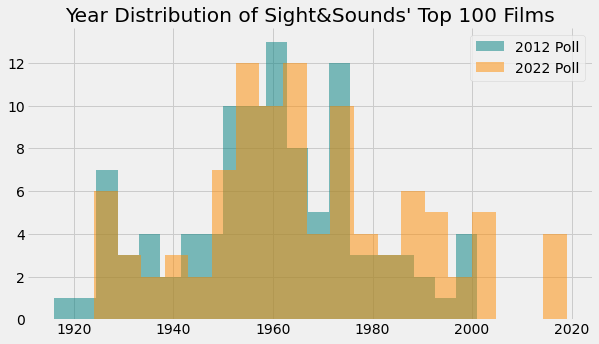

In [ ]:
# Let's see this in overlapping histograms
plt.figure(figsize=(9, 5))
plt.hist(df_2012["Year"], bins=20, color="teal", alpha=0.5, label="2012 Poll")
plt.hist(df_2022["Year"], bins=20, color="darkorange", alpha=0.5, label="2022 Poll")
sns.despine(left=True, bottom=True)
plt.legend(loc='upper right')
plt.title("Year Distribution of Sight&Sounds' Top 100 Films")
plt.savefig("Year_Distribution_gg.jpg", dpi=250, bbox_inches='tight')

In [25]:
# Let's see the gender of directors
dir_gender_2012 = df_2012["Director_gender"]
dir_gender_2022 = df_2022["Director_gender"]

In [37]:
# Our dataframe sometimes has multiple directors in one row, separated by &
# In order to count the gender of all directors, we need to split them
individual_gender_2012 = df_2012["Director_gender"].str.split('&').explode("Director_gender")
individual_gender_2022 = df_2022["Director_gender"].str.split('&').explode("Director_gender")
# Now we can count the individual values
individual_gender_count_2012 = individual_gender_2012.value_counts(normalize=True)
individual_gender_count_2022 = individual_gender_2022.value_counts(normalize=True)

print(individual_gender_count_2012)
print(individual_gender_count_2022)

male      0.981308
female    0.018692
Name: Director_gender, dtype: float64
male      0.896226
female    0.103774
Name: Director_gender, dtype: float64


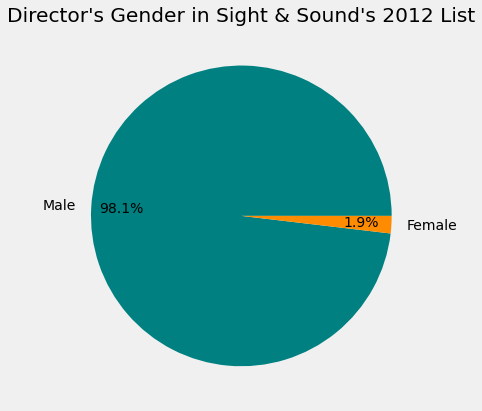

In [38]:
# Pie chart for 2012 Sight & Sound Poll
fig = plt.figure(1, figsize=(6, 7))
plt.pie(individual_gender_count_2012, labels = ["Male", "Female"], colors = ["teal", "darkorange"], autopct="%.1f%%", textprops={'fontsize': 14}, pctdistance=0.8)
plt.title("Director's Gender in Sight & Sound's 2012 List")
plt.savefig("Director_Gender_2012_Pie_538.jpg", dpi=250, bbox_inches='tight')

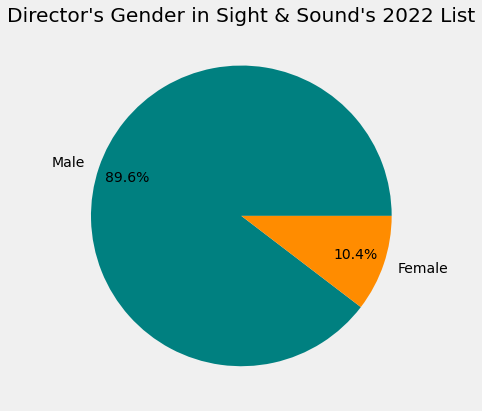

In [39]:
# Pie chart for 2022 Sight & Sound Poll
fig = plt.figure(1, figsize=(6, 7))
plt.pie(individual_gender_count_2022, labels = ["Male", "Female"], colors = ["teal", "darkorange"], autopct="%.1f%%", textprops={'fontsize': 14}, pctdistance=0.8)
plt.title("Director's Gender in Sight & Sound's 2022 List")
plt.savefig("Director_Gender_2022_Pie.jpg", dpi=250, bbox_inches='tight')

The way we counted things before was per individual, not per film. That means that movies with two directors were counted twice. What if we wanted to know the percentage of *films* directed by women, by men, or by mixed teams?

In [27]:
#To avoid double counting, we can make 3 categories: male (if all directors are male), female (if all are female) and mixed (if there is a mixed team)
df_2022["Director_gender"].value_counts(normalize=True)

male           0.84
female         0.10
male&male      0.05
female&male    0.01
Name: Director_gender, dtype: float64

In [28]:
df_2012["Director_gender"].value_counts(normalize=True)

male         0.91
male&male    0.07
female       0.02
Name: Director_gender, dtype: float64

In [29]:
# New dataframe with just the information we need: year and director's Gender
film_gender_2012 = df_2012[["Year", "Director", "Director_gender", "English_Title"]]
film_gender_2022 = df_2022[["Year", "Director", "Director_gender", "English_Title"]]

In [30]:
print(film_gender_2012)

     Year                       Director Director_gender         English_Title
0    1916                 D. W. Griffith            male           Intolerance
1    1924  Buster Keaton&Roscoe Arbuckle       male&male          Sherlock Jr.
2    1925              Sergei Eisenstein            male   Battleship Potemkin
3    1925             Erich von Stroheim            male                 Greed
4    1926   Buster Keaton&Clyde Bruckman       male&male           The General
..    ...                            ...             ...                   ...
113  1994                      Béla Tarr            male            Sátántangó
114  1998                   Claire Denis          female          Beau Travail
115  1999                    Edward Yang            male                 Yi Yi
117  2001                   Wong Kar-wai            male  In the Mood for Love
118  2001                    David Lynch            male      Mulholland Drive

[100 rows x 4 columns]


In [31]:
print(film_gender_2012["Director_gender"].isnull().values.any())
print(film_gender_2022["Director_gender"].isnull().values.any())

False
False


In [32]:
#Replace the 2021 male&male with male
film_gender_2012.loc[:, "Director_gender"].replace("male&male", "male", inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [33]:
film_gender_2012

,Year,Director,Director_gender,English_Title
0,1916,D. W. Griffith,male,Intolerance
1,1924,Buster Keaton&Roscoe Arbuckle,male,Sherlock Jr.
2,1925,Sergei Eisenstein,male,Battleship Potemkin
3,1925,Erich von Stroheim,male,Greed
4,1926,Buster Keaton&Clyde Bruckman,male,The General
...,...,...,...,...
113,1994,Béla Tarr,male,Sátántangó
114,1998,Claire Denis,female,Beau Travail
115,1999,Edward Yang,male,Yi Yi
117,2001,Wong Kar-wai,male,In the Mood for Love


In [34]:
#Replace the 2022 male&male with male
film_gender_2022.loc[:, "Director_gender"].replace("male&male", "male", inplace=True)
#Replace the 2022 (since there weren't any on 2021) female&male with mixed
film_gender_2022.loc[:, "Director_gender"].replace("female&male", "mixed", inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [35]:
film_gender_2012["Director_gender"].value_counts(normalize=True)

male      0.98
female    0.02
Name: Director_gender, dtype: float64

In [36]:
film_gender_2022["Director_gender"].value_counts(normalize=True)

male      0.89
female    0.10
mixed     0.01
Name: Director_gender, dtype: float64

In [40]:
# Most common directors
# Our dataframe sometimes has multiple directors in one row, separated by &
# In order to count the gender of all directors, we need to split them
individual_directors_2012 = df_2012['Director'].str.split('&').explode("Director")
individual_directors_2022 = df_2022['Director'].str.split('&').explode("Director")
# Now we can count the individual values
individual_directors_count_2012 = individual_directors_2012.value_counts().to_frame()
individual_directors_count_2022 = individual_directors_2022.value_counts().to_frame()

In [41]:
#Turn 2012 data into data frame
dir_2012 = individual_directors_count_2012.reset_index()
dir_2012 = dir_2012.rename(columns={'index': 'Director', 'Director': 'Number of Films'})

In [42]:
#Turn 2022 data into data frame
dir_2022 = individual_directors_count_2022.reset_index()
dir_2022 = dir_2022.rename(columns={'index': 'Director', 'Director': 'Number of Films'})

In [44]:
print(dir_2012)
print(dir_2022)

               Director  Number of Films
0        Ingmar Bergman                4
1      Alfred Hitchcock                4
2       Jean-Luc Godard                4
3   Carl Theodor Dreyer                3
4        Robert Bresson                3
..                  ...              ...
66            John Ford                1
67         Howard Hawks                1
68         Paul Helmick                1
69         Douglas Sirk                1
70         Wong Kar-wai                1

[71 rows x 2 columns]
            Director  Number of Films
0   Alfred Hitchcock                4
1    Jean-Luc Godard                4
2    Stanley Kubrick                3
3   Andrei Tarkovsky                3
4       Billy Wilder                3
..               ...              ...
69       Jean Renoir                1
70    Věra Chytilová                1
71    Ingmar Bergman                1
72  Gillo Pontecorvo                1
73    Céline Sciamma                1

[74 rows x 2 columns]


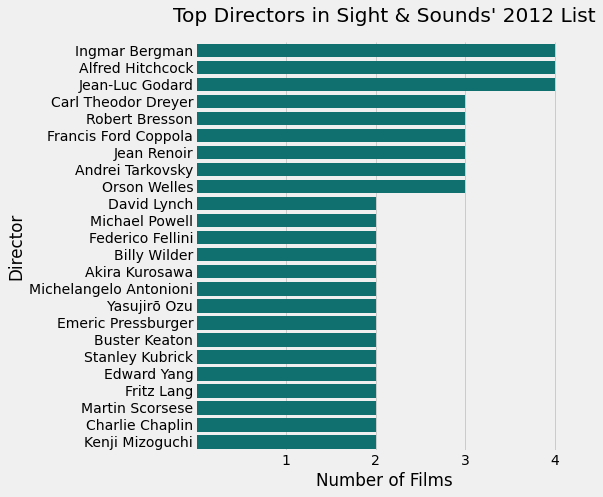

In [45]:
# Bar chart for top directors 2012
plt.figure(figsize=(6, 7))
sns.barplot(data=dir_2012[:24], x="Number of Films", y="Director", color="teal")                                                  
plt.xticks(range(1, 5))
plt.title("Top Directors in Sight & Sounds' 2012 List", pad=20)
sns.despine(left=True, bottom=True)
plt.savefig("S&S2012TopDirectors_538.jpg", dpi=350, bbox_inches='tight')
plt.show()

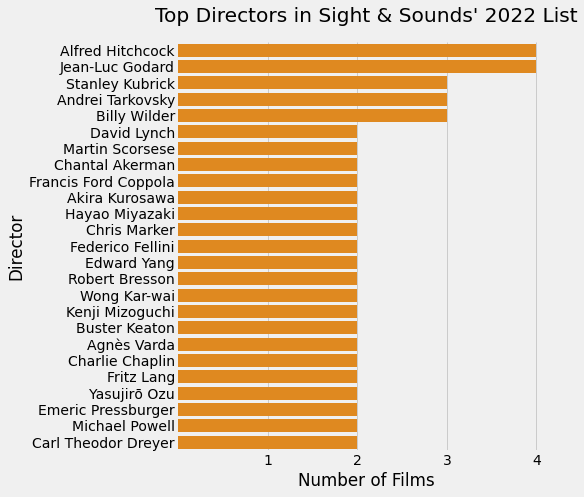

In [46]:
# Bar chart for top directors 2012
plt.figure(figsize=(6, 7))
sns.barplot(data=dir_2022[:25], x="Number of Films", y="Director", color="darkorange")
plt.xticks(range(1, 5))
plt.title("Top Directors in Sight & Sounds' 2022 List", pad=20)
sns.despine(left=True, bottom=True)
plt.savefig("S&S2022TopDirectors.jpg", dpi=350, bbox_inches='tight')
plt.show()

In [47]:
# Country Count
country_count_2012 = df_2012[["Country"]]
country_count_2022 = df_2022[["Country"]]

In [51]:
country_count_2012 = country_count_2012.drop('Country', axis=1).join(country_count_2012['Country'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Country'))
country_count_2022 = country_count_2022.drop('Country', axis=1).join(country_count_2022['Country'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Country'))

In [52]:
# Run the count_frequency function to create a data frame with the frequency of countries
frequent_countries_2012 = count_frequency(country_count_2012, "Country")
frequent_countries_2022 = count_frequency(country_count_2022, "Country")

In [53]:
print(frequent_countries_2012)
print(frequent_countries_2022)

           Country  Number of Items  Frequency
0    United States               36      0.288
1           France               31      0.248
2            Italy               13      0.104
3            Japan                7      0.056
4     Soviet Union                6      0.048
5   United Kingdom                6      0.048
6           Sweden                5      0.040
7     West Germany                3      0.024
8          Germany                3      0.024
9          Denmark                2      0.016
10          Taiwan                2      0.016
11           India                1      0.008
12         Algeria                1      0.008
13          Mexico                1      0.008
14           Spain                1      0.008
15         Senegal                1      0.008
16         Belgium                1      0.008
17            Iran                1      0.008
18     South Korea                1      0.008
19         Hungary                1      0.008
20     Switze

In [54]:
# Run group_others function with 1% for 2012.
countries_over_1pct_2012 = group_others(frequent_countries_2012, 'Country', 0.01)
print(countries_over_1pct_2012)

           Country  Number of Items  Frequency
0    United States               36      0.288
1           France               31      0.248
2            Italy               13      0.104
3            Japan                7      0.056
4     Soviet Union                6      0.048
5   United Kingdom                6      0.048
6           Sweden                5      0.040
7          Germany                3      0.024
8     West Germany                3      0.024
9          Denmark                2      0.016
10          Taiwan                2      0.016
11          Others               11      0.088


In [55]:
# Run group_others function with 1% for 2022.
countries_over_1pct_2022 = group_others(frequent_countries_2022, 'Country', 0.01)
print(countries_over_1pct_2022)

           Country  Number of Items  Frequency
0    United States               36   0.272727
1           France               32   0.242424
2            Italy               14   0.106061
3            Japan               10   0.075758
4   United Kingdom                6   0.045455
5          Germany                5   0.037879
6     Soviet Union                5   0.037879
7          Belgium                2   0.015152
8        Hong Kong                2   0.015152
9          Senegal                2   0.015152
10     South Korea                2   0.015152
11          Sweden                2   0.015152
12          Taiwan                2   0.015152
13    West Germany                2   0.015152
14          Others               10   0.075758


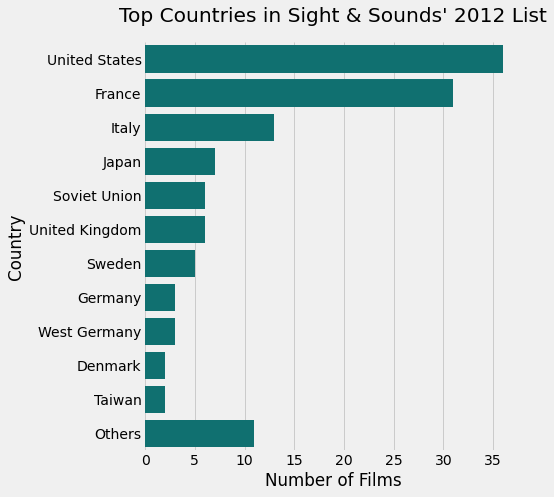

In [56]:
# Bar chart for 2021
plt.figure(figsize=(6, 7))
sns.barplot(data=countries_over_1pct_2012, x="Number of Items", y="Country", color="teal").set(xlabel='Number of Films')
plt.title("Top Countries in Sight & Sounds' 2012 List", pad=20)
sns.despine(left=True, bottom=True)
plt.savefig("S&S2012TopCountries.jpg", dpi=250, bbox_inches='tight')
plt.show()

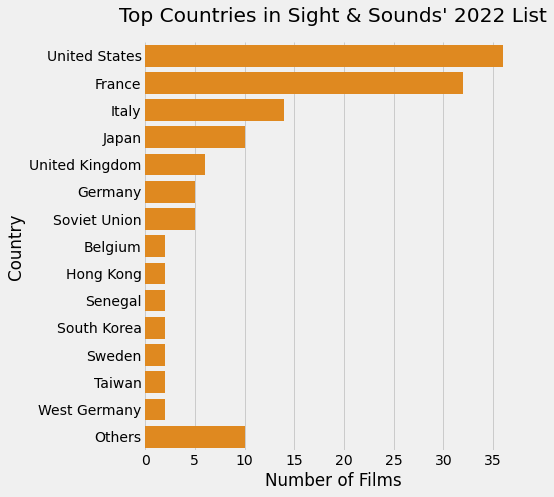

In [57]:
# Bar chart for 2021
plt.figure(figsize=(6, 7))
sns.barplot(data=countries_over_1pct_2022, x="Number of Items", y="Country", color="darkorange").set(xlabel='Number of Films')
plt.title("Top Countries in Sight & Sounds' 2022 List", pad=20)
sns.despine(left=True, bottom=True)
plt.savefig("S&S2022TopCountries.jpg", dpi=250, bbox_inches='tight')
plt.show()